In [17]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [43]:
def evapo_formula(radiacao_global_kj):
    rad_mj = radiacao_global_kj * 0.001
    eto_mm_dia = rad_mj * 0.408
    return max(0, eto_mm_dia)

# Limpeza e formatação de dados

In [39]:
df_clima = pd.read_csv('../DF/clima.csv', sep=';', encoding='utf-8-sig')
col_data = 'data'
col_hora = 'Hora Medicao'
col_temp = 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)'
col_rad = 'RADIACAO GLOBAL(Kj/m²)'
df_clima.loc[df_clima[col_rad] < 0, col_rad] = np.nan
hr_form = df_clima[col_hora].astype(str).str.zfill(4)
hr_dp = hr_form.str.slice_replace(start=2, stop=2, repl=':')
srt_dh = df_clima[col_data] + ' ' + hr_dp
df_clima['data_hora'] = pd.to_datetime(srt_dh,format='%d/%m/%Y %H:%M', errors='coerce')
df_clima = df_clima.set_index('data_hora').dropna(subset=['data'])
agregacoes = {
    col_temp: ['min', 'max', 'mean'],
    col_rad: 'sum'
}
df_clima_diario = df_clima.resample('D').agg(agregacoes)
df_clima_diario.columns = ['_'.join(col).strip() for col in df_clima_diario.columns.values]
df_clima_diario = df_clima_diario.rename(columns={
    f'{col_temp}_min': 'TEMP_MIN',
    f'{col_temp}_max': 'TEMP_MAX',
    f'{col_temp}_mean': 'TEMP_MED',
    f'{col_rad}_sum': 'RADIACAO_GLOBAL_TOTAL'
})

df_clima_diario.interpolate(method='linear', inplace=True)
print(df_clima_diario.head())
print(df_clima_diario.isnull().sum())


            TEMP_MIN  TEMP_MAX   TEMP_MED  RADIACAO_GLOBAL_TOTAL
data_hora                                                       
2018-01-01      24.5      37.7  30.962500                22852.9
2018-01-02      24.2      34.9  29.770833                19710.0
2018-01-03      23.8      36.4  28.700000                17464.4
2018-01-04      23.7      33.3  28.625000                14472.9
2018-01-05      24.8      30.2  27.679167                 6605.6
TEMP_MIN                 0
TEMP_MAX                 0
TEMP_MED                 0
RADIACAO_GLOBAL_TOTAL    0
dtype: int64


In [45]:
df_clima_diario['evapo_esti_mm'] = df_clima_diario['RADIACAO_GLOBAL_TOTAL'].apply(evapo_formula)
print(df_clima_diario[['RADIACAO_GLOBAL_TOTAL', 'evapo_esti_mm']].head())


            RADIACAO_GLOBAL_TOTAL  evapo_esti_mm
data_hora                                       
2018-01-01                22852.9       9.323983
2018-01-02                19710.0       8.041680
2018-01-03                17464.4       7.125475
2018-01-04                14472.9       5.904943
2018-01-05                 6605.6       2.695085


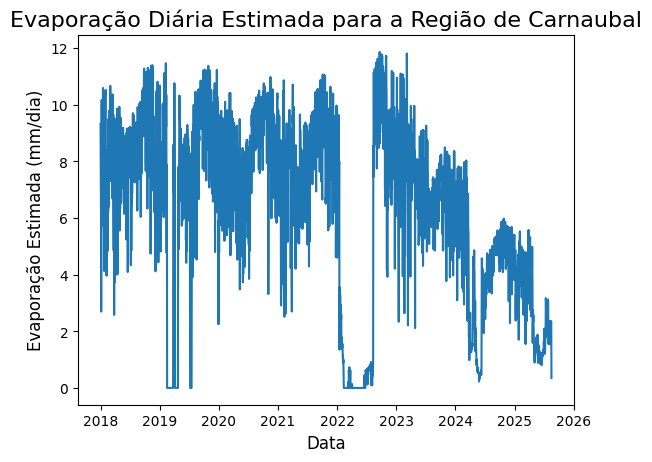

In [ ]:
plt.Figure(figsize=(15, 7))
sns.lineplot(data=df_clima_diario['evapo_esti_mm'])
plt.title('Evaporação Diária Estimada para a Região de Carnaubal', fontsize=16)
plt.xlabel('Data', fontsize=12) 
plt.ylabel('Evaporação Estimada (mm/dia)', fontsize=12)
plt.show()